<a href="https://colab.research.google.com/github/maryamalzahrani/Stress_Testing_student_facing/blob/main/Stress_Testing_student_facing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/Edward-Beck/dsc-5-capstone-project-online-ds-pt-100118/master/cap%20pictures/Cap1.png)

In [ ]:
#General Python Libraries
import numpy as np
import pandas as pd
#Libraries for Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)
#Libraries for Forecasting 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
#Libraries for Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report ,precision_score, recall_score, accuracy_score
from patsy import dmatrices





In [ ]:
# keep the random seed
np.random.seed(112)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2019-10-31')
len(dates)

1034

In [ ]:
# Creating time series in a list of random movement 
error = np.random.normal(0,2,len(dates))
Y_0 = 8000
mu = 500
phi = 0.7

def random_time_series( Y_0 , mu , phi ):
    TS = [None] * len(dates)
    std = mu* 0.33
    error = np.random.normal(mu,std,len(dates))
    y = Y_0*10
    a =list(range(0,100))
    b=[]
    c= [0,1,2,3,5,10,15,19,26,32,38,42]
    for y in c:
        for x in a:
            b.append(y)
    d =np.array(b)
    d
    for i, row in enumerate(dates):
        TS[i] = mu + y * phi + 0.135*error[i] +d[i]*mu*0.035
        y = TS[i] - .8*mu
    return  TS
    


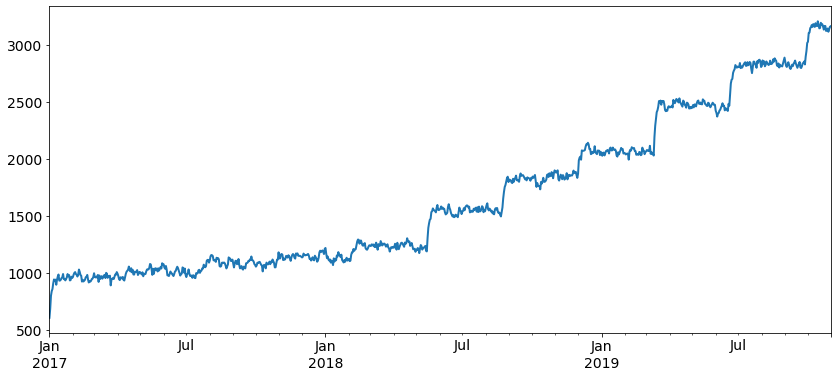

In [ ]:
#Function Test
np.random.seed(1234)
vanilla_ts = random_time_series( Y_0 , mu , phi )
series =  pd.Series(vanilla_ts, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14)



In [ ]:
#Creates Asset Portfolio
assets = 1000000000

# name = #TODO'<Group_name>_Trust_Fund'
name = "Fintech Instructors Pension Plan (Fund 1)"

def assets_portfolio(assets, name):
    asset_port = pd.DataFrame()
    asset_port['date'] = dates
    asset_port['name'] = name
    RM = assets*0.30 
    
    RMmu = RM / 3500
    mu = RMmu
    RMstd= 0.33 * RMmu
    std = RMstd
    random_yo = np.random.normal(mu,std,1)
    RMYo = 1*(RMmu)
    RMrate = 0.07
    asset_port['Residential_Mortgages'] = random_time_series( RMYo , RMmu , RMrate )
    
    CL = assets*0.20 
    CLmu = CL / 906
    CLstd = 0.33* CLmu
    mu = CLmu 
    std = CLstd
    random_yo = np.random.normal(mu,std,1)
    CLYo = 1 * CLmu 
    CLrate = 0.049
    
    asset_port['Commercial_Loans'] = random_time_series(CLYo, CLmu, CLrate)
    
    PL = assets*0.150 
    PLmu = PL / 860
    PLstd = 0.33* PLmu
    mu = PLmu 
    std = PLstd 
    random_yo = np.random.normal(mu,std,1)
    PLYo = 1 * PLmu 
    PLrate = 0.135
    asset_port['Personal_Loans'] = random_time_series(PLYo, PLmu, PLrate)
    
    
    FL = assets*0.05 
    FLmu = FL / 450
    FLstd = 0.33* FLmu
    mu = FLmu  
    std = FLstd 
    random_yo = np.random.normal(mu,std,1)
    FLYo = 1 * FLmu 
    FLrate = 0.059
    asset_port['Financial_Lease'] = random_time_series(FLYo, FLmu, FLrate)
    
    
    FI = assets*0.15 
    FImu = FI / 1506
    FIstd = 0.33* FImu
    mu = FImu  
    std = FIstd 
    random_yo = np.random.normal(mu,std,1)
    FIYo = 1 * FImu 
    FIrate = 0.0025
    asset_port['Financial_Investments'] = random_time_series(FIYo, FImu, FIrate)
    
    OI = assets*0.05 
    OImu = OI / 609
    OIstd = 0.33* OImu
    mu = OImu  
    std = OIstd 
    random_yo = np.random.normal(mu,std,1)
    OIYo =  OImu 
    OIrate = 0.101
    asset_port['Other_Investments'] = random_time_series(OIYo, OImu, OIrate)
    
    I = assets*0.01 
    Imu = I / 656
    Istd = 0.33* Imu
    mu = Imu  
    std = Istd 
    random_yo = np.random.normal(mu,std,1)
    IYo =  Imu 
    Irate = 0.0046
    asset_port['Inventories'] = random_time_series(IYo, Imu, Irate)
    
    IA = assets*0.03 
    IAmu = IA / 325
    IAstd = 0.33* IAmu
    mu = IAmu  
    std = IAstd
    random_yo = np.random.normal(mu,std,1)
    IAYo =  IAmu 
    IArate = 0.0095
    asset_port['Intangible_Assets'] = random_time_series(IAYo, IAmu, IArate)
    
    CE = assets*0.04 
    CEmu = CE / 750
    CEstd = 0.33* CEmu
    mu = CEmu 
    std = CEstd
    random_yo = np.random.normal(mu,std,1)
    CEYo =  CEmu 
    CErate = 0.048
    asset_port['Cash_Equivalent'] = random_time_series(CEYo, CEmu, CErate)
    
    OR = assets*0.02 
    ORmu = OR / 103
    ORstd = 0.33* ORmu
    mu = ORmu 
    std = ORstd
    random_yo = np.random.normal(mu,std,1)
    ORYo =  ORmu 
    ORrate = 0.0078
    asset_port['Other_Receivables'] = random_time_series(ORYo, ORmu, ORrate)
    
    asset_port = asset_port.round(2)
    
    
    return asset_port


In [ ]:
# Asset Portfolio Function Call
as_por = assets_portfolio(assets, name).iloc[15:,:]
#Improvements could be adding parameter of stability or liklihood of reimbursement
#Also consider continuous updating
as_por.head(1)

,date,name,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Inventories,Intangible_Assets,Cash_Equivalent,Other_Receivables
15,2017-01-16,Fintech Instructors Pension Plan (Fund 1),104477.06,251806.95,215981.89,130207.34,110118.42,91551.23,17315.44,103241.78,61532.63,219958.49


In [ ]:
#Asset Portfolio Overview
as_por.describe().round(2)

,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Inventories,Intangible_Assets,Cash_Equivalent,Other_Receivables
count,1019.00,1019.00,1019.00,1019.00,1019.00,1019.00,1019.00,1019.00,1019.00,1019.00
mean,139487.21,355265.95,294065.66,179867.68,156316.36,135785.43,23947.74,145373.58,85646.77,305711.47
std,37406.18,94143.64,81811.78,48051.84,40856.02,37213.25,6247.49,38090.89,22747.27,79704.46
min,89749.64,234764.40,181491.72,118245.94,98660.75,86659.14,15308.23,94665.48,54860.41,199293.23
25%,107147.56,273228.19,222734.56,138373.78,121401.56,103439.92,18540.60,112223.31,65898.10,238350.95
50%,129085.58,327697.25,272436.22,165810.19,145502.17,125402.86,22234.32,135025.20,79262.95,283086.81
75%,163814.59,416364.45,348124.04,210638.97,184338.50,159916.36,28084.88,170728.36,100144.57,357520.84
max,228477.28,579833.57,488345.11,296159.18,256171.11,224620.91,38818.95,236378.56,140743.28,506614.57


Text(0.5, 1.0, 'Commercial Loans')

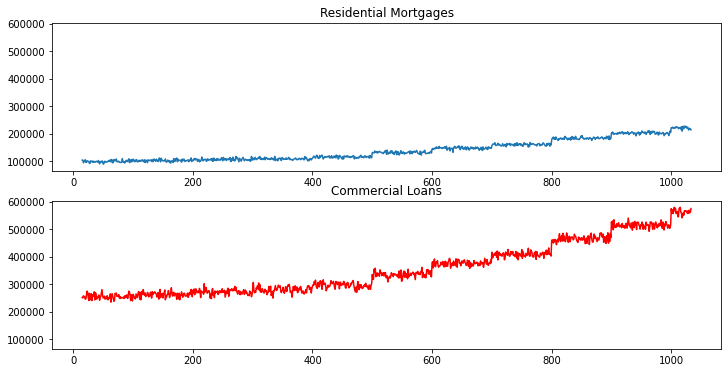

In [ ]:
#Visual Inspection of first two features

f, (ax1, ax2) = plt.subplots(2, 1,figsize = (12,6), sharey=True)

ax1.plot(as_por.Residential_Mortgages, label = 'Residential_Mortgages')
ax1.set_title('Residential Mortgages')

print('')
ax2.plot(as_por.Commercial_Loans, label = 'Commercial_Loans', color ='r' )
ax2.set_title('Commercial Loans')

Text(0.5, 1.0, 'ax2')

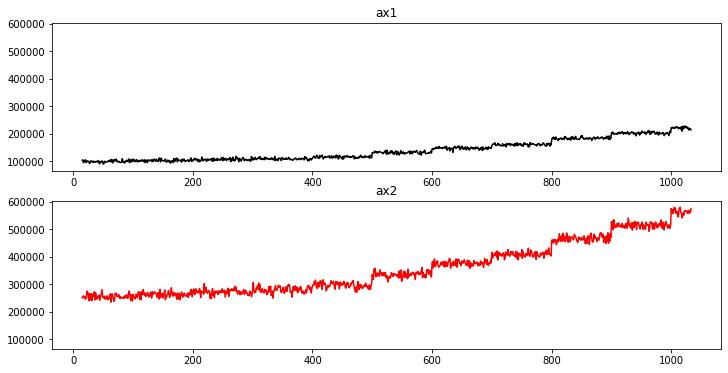

In [ ]:
#Visual Inspection of first two features

#Students, please complete

f, (ax1, ax2) = plt.subplots(2, 1,figsize = (12,6), sharey=True)

ax1.plot(as_por.Residential_Mortgages, label = ax1 ,color ='black')
ax1.set_title("ax1")

print('')
ax2.plot(as_por.Commercial_Loans, label = ax2  , color ='red' )
ax2.set_title("ax2")

In [ ]:
#Asset Portfolio Diagram
def asset_diagram(as_por):
    plt.figure(figsize = (24,12))
    plt.plot(as_por.Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(as_por.Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(as_por.Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(as_por.Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(as_por.Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(as_por.Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    plt.plot(as_por.Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    plt.plot(as_por.Intangible_Assets, label = 'Intangible Assets', color = 'r', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Asset Portfolio Under Ideal Conditions")

    plt.legend()

    plt.show()
    return


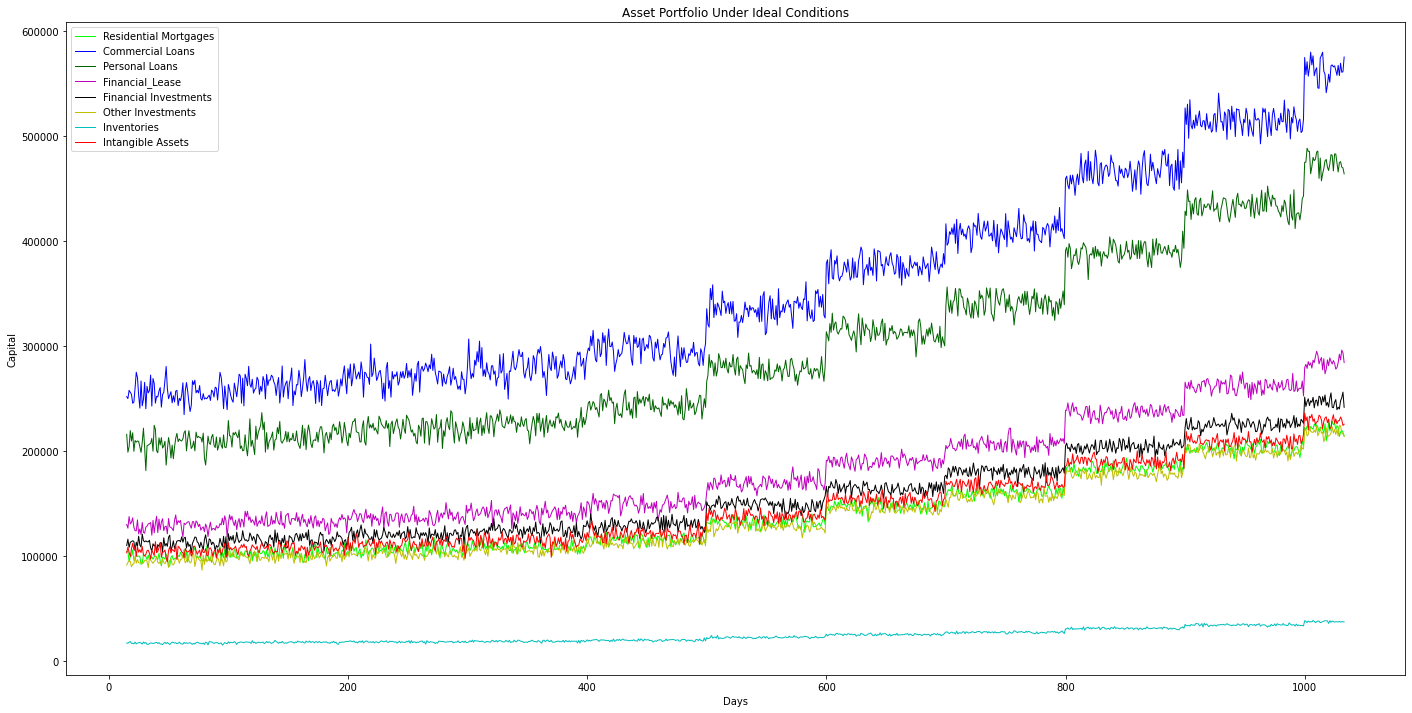

In [ ]:
#Function Call Asset Portfolio Diagram
asset_diagram(as_por)

In [ ]:
#Creation of Liability Portfolio 
def liabilities_portfolio(assets, name):
    lia_port = pd.DataFrame()
    lia_port['date'] = dates
    
    
    TD = assets*0.42 
    TDmu = TD / 4500 
    TDstd = 0.33* TDmu
    mu = TDmu 
    std = TDstd
    random_yo = np.random.normal(mu,std,1)
    TDYo =  TDmu 
    TDrate = 0.079
    lia_port['Term_Deposit'] = random_time_series( TDYo , TDmu , TDrate )
    
    
    DD = assets*0.25 
    DDmu = DD / 2700
    DDstd = 0.33* DDmu
    mu = DDmu 
    std = DDstd
    random_yo = np.random.normal(mu,std,1)
    DDYo =  DDmu 
    DDrate = 0.079
    lia_port['Demand_Deposit'] = random_time_series( DDYo , DDmu , DDrate )
    
    BD = assets*0.08 
    BDmu = BD / 500 
    BDstd = 0.33* BDmu
    mu = BDmu 
    std = BDstd
    random_yo = np.random.normal(mu,std,1)
    BDYo =  BDmu 
    BDrate = 0.109
    lia_port['Broker_Deposit'] = random_time_series( BDYo , BDmu , BDrate )
    
    SB = assets*0.04 
    SBmu = SB / 2500
    SBstd = 0.33* SBmu
    mu = SBmu 
    std = SBstd
    random_yo = np.random.normal(mu,std,1)
    SBYo = SBmu 
    SBrate = 0.125
    lia_port['Short_Borrow'] = random_time_series( SBYo , SBmu , SBrate )
    
    
    LB = assets*0.12 
    LBmu = LB / 2100 
    LBstd = 0.33* LBmu
    mu = LBmu 
    std = LBstd
    random_yo = np.random.normal(mu,std,1)
    LBYo =  LBmu 
    LBrate = 0.068
    lia_port['Long_Borrow'] = random_time_series( LBYo , LBmu , LBrate )
    
    NL = assets*0.05 
    NLmu = NL / 1200
    NLstd = 0.33* NLmu
    mu = NLmu 
    std = NLstd
    random_yo = np.random.normal(mu,std,1)
    NLYo =  NLmu 
    NLrate = 0.057
    lia_port['NonInterest_Liabilities'] = random_time_series( NLYo , NLmu , NLrate )
    
    
    DR = assets*0.02 
    DRmu = DR / 420
    DRstd = 0.33* DRmu
    mu = DRmu 
    std = DRstd
    random_yo = np.random.normal(mu,std,1)
    DRYo =  DRmu 
    DRrate = 0.035
    lia_port['Term_Deposit'] = random_time_series( DRYo , DRmu , DRrate )
    
    
    OP = assets*0.02 
    OPmu = OP / 310
    OPstd = 0.33* OPmu
    mu = OPmu 
    std = OPstd
    random_yo = np.random.normal(mu,std,1)
    OPYo =  OPmu 
    OPrate = 0.043
    lia_port['Other_Payable'] = random_time_series( TDYo , TDmu , TDrate )
    lia_port = lia_port.round(2)
    return lia_port


In [ ]:
#Function Call of Liability Portfolio
lb_df = liabilities_portfolio(assets, name).round(2)
lb_df.head(1)

,date,Term_Deposit,Demand_Deposit,Broker_Deposit,Short_Borrow,Long_Borrow,NonInterest_Liabilities,Other_Payable
0,2017-01-01,50473.25,108931.48,189148.75,17600.7,67121.18,46960.64,106671.16


In [ ]:
#Diagram of Liability Portfolio
def liability_diagram(lb_df):
    plt.figure(figsize = (24,12))
    plt.plot(lb_df.Term_Deposit, label = 'Term Deposit', color = 'lime', linewidth =1 )
    plt.plot(lb_df.Demand_Deposit, label = 'Demand Deposit', color = 'b', linewidth =1 )
    plt.plot(lb_df.Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(lb_df.Short_Borrow, label = 'Short Borrow', color = 'm', linewidth =1 )
    plt.plot(lb_df.Long_Borrow, label = 'LongBorrow', color = 'k', linewidth =1 )
    plt.plot(lb_df.Other_Payable, label = 'Other Payable', color = 'y', linewidth =1 )
    plt.plot(lb_df.NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'c', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Liability Portfolio Under Ideal Conditions")

    plt.legend()

    plt.show()
    return


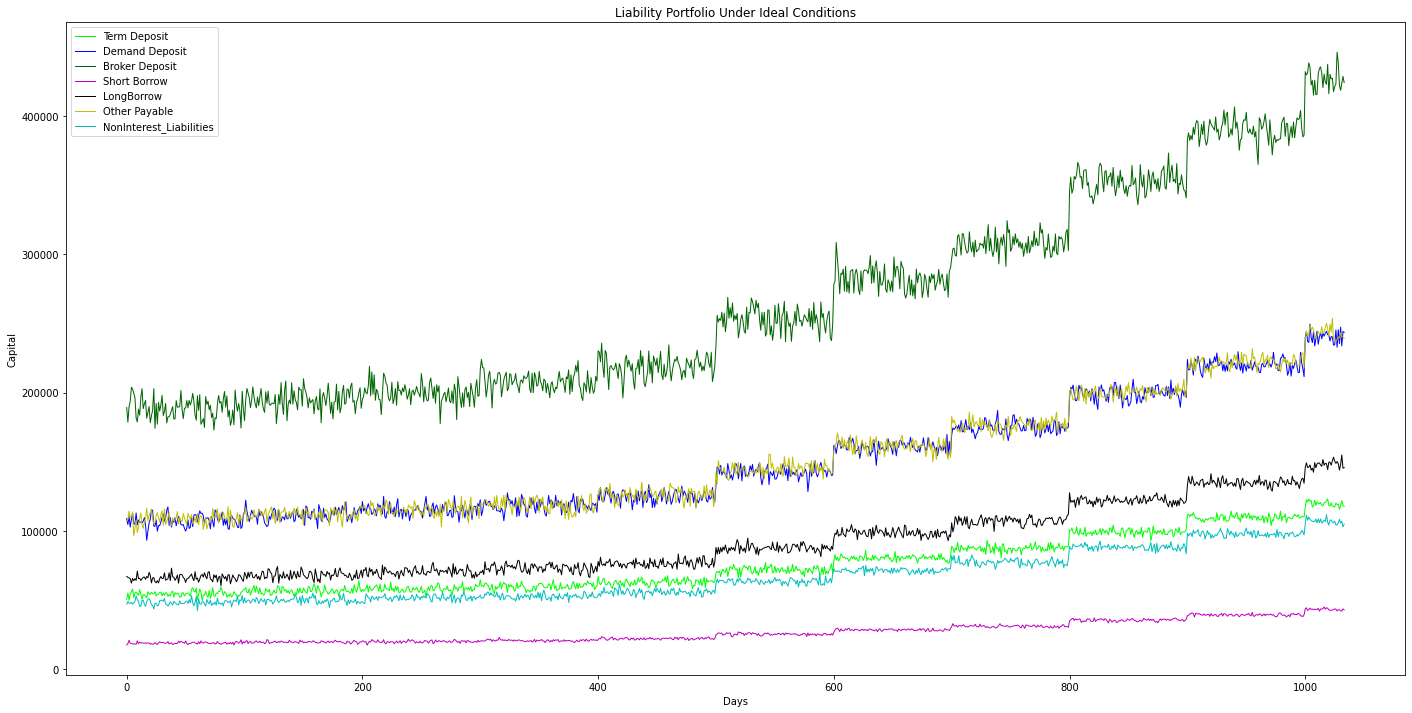

In [ ]:
#Function Call of Liabilty Portfolio Diagram
liability_diagram(lb_df)

In [ ]:
#Creates table of Assets and Liabilities
def combine_portfolios(as_por,lb_df):
    df = as_por.merge(lb_df, left_on='date', right_on='date')
    df['datetime'] = pd.to_datetime(df['date'])
    df = df.set_index('datetime')
    df.drop(['date'], axis=1, inplace=True)
    
    return df


In [ ]:
#Function Call of Combined Assets and Liabilities Portfolios
df = combine_portfolios(as_por,lb_df)
df.head(1)

,name,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Inventories,Intangible_Assets,Cash_Equivalent,Other_Receivables,Term_Deposit,Demand_Deposit,Broker_Deposit,Short_Borrow,Long_Borrow,NonInterest_Liabilities,Other_Payable
datetime,,,,,,,,,,,,,,,,,,
2017-01-16,Fintech Instructors Pension Plan (Fund 1),104477.06,251806.95,215981.89,130207.34,110118.42,91551.23,17315.44,103241.78,61532.63,219958.49,53859.85,109579.11,191848.55,18902.67,66672.15,46929.49,106919.96


In [ ]:
#Creates a table of the Equity Risk of the Assets due to change 
# in stock prices (stress) 
def equity_risk_df(stress):
    er_df = pd.DataFrame()

    er_df['date'] = dates
    er_df['datetime'] = pd.to_datetime(er_df['date'])
    er_df = er_df.set_index('datetime')
    er_df.drop(['date'], axis=1, inplace=True)
    
    a =list(range(0,100))
    b=[]
    c= [3,5,10,15,17,19,26,30,32,38,42]
    for y in c:
        for x in a:
            if(len(b)<1034):
                b.append(y)
    d =np.array(b)
    er_df['Decr_%_of_Stock'] = d* 0.5 * stress

    er_df['Residential_Mortgages'] = df['Residential_Mortgages']*er_df['Decr_%_of_Stock']*(-1.2)+df['Residential_Mortgages']
    er_df['Commercial_Loans'] = df['Commercial_Loans']*er_df['Decr_%_of_Stock']*(-1.8)+df['Commercial_Loans']
    er_df['Personal_Loans'] = df['Personal_Loans']*er_df['Decr_%_of_Stock']*(-1.22)+df['Personal_Loans']
    er_df['Financial_Lease'] = df['Financial_Lease']*er_df['Decr_%_of_Stock']*(-1.52)+df['Financial_Lease']
    er_df['Financial_Investments'] = df['Financial_Investments']*er_df['Decr_%_of_Stock']*(-1.62)+df['Financial_Investments']
    er_df['Other_Investments'] = df['Other_Investments']*er_df['Decr_%_of_Stock']*(-1.32)+df['Other_Investments']
    er_df['Intangible_Assets'] = df['Intangible_Assets']*er_df['Decr_%_of_Stock']*(-1.74)+df['Intangible_Assets']
    er_df['Inventories'] = df['Inventories']*er_df['Decr_%_of_Stock']*(-1.12)+df['Inventories']
    er_df['Cash_Equivalent'] = df['Cash_Equivalent']*er_df['Decr_%_of_Stock']*(-1.65)+df['Cash_Equivalent']
    er_df['Other_Receivables'] = df['Other_Receivables']*er_df['Decr_%_of_Stock']*(-1.32)+df['Other_Receivables']

    er_df['Term_Deposit'] = df['Term_Deposit']*er_df['Decr_%_of_Stock']*(1.18)+df['Term_Deposit']
    er_df['Demand_Deposit'] = df['Demand_Deposit']*er_df['Decr_%_of_Stock']*(1.052)+df['Demand_Deposit']
    er_df['Broker_Deposit'] = df['Broker_Deposit']*er_df['Decr_%_of_Stock']*(1.092)+df['Broker_Deposit']
    er_df['Long_Borrow'] = df['Long_Borrow']*er_df['Decr_%_of_Stock']*(1.22)+df['Long_Borrow']
    er_df['Short_Borrow'] = df['Short_Borrow']*er_df['Decr_%_of_Stock']*(1.148)+df['Short_Borrow']
    er_df['NonInterest_Liabilities'] = df['NonInterest_Liabilities']*er_df['Decr_%_of_Stock']*(1.062)+df['NonInterest_Liabilities']
    er_df['Other_Payable'] = df['Other_Payable']*er_df['Decr_%_of_Stock']*(1.08)+df['Other_Payable']

    er_df['Total_Assets'] = (er_df['Other_Receivables'] + er_df['Cash_Equivalent'] + er_df['Inventories'] + er_df['Intangible_Assets'] +  er_df['Other_Investments']+ er_df['Financial_Investments']+ er_df['Financial_Lease'] + er_df['Residential_Mortgages'] + er_df['Commercial_Loans'])
    er_df['Total_Liability'] = er_df['Term_Deposit']+er_df['Demand_Deposit']+er_df['Broker_Deposit']+er_df['Long_Borrow']+er_df['Short_Borrow']+ er_df['NonInterest_Liabilities']+er_df['Other_Payable']
    er_df['Spread'] = er_df['Total_Assets'] - er_df['Total_Liability']
    er_df['Spread_Perentage'] = (er_df['Spread']/ er_df['Total_Assets'])*100
    er_df = er_df.round(2)
    er_df = er_df.iloc[15:,:]
    return er_df


In [ ]:
#Function Call of Equity Risk Portfolio
er_df = equity_risk_df(.02)
er_df.head(1)

,Decr_%_of_Stock,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Intangible_Assets,Inventories,Cash_Equivalent,Other_Receivables,Term_Deposit,Demand_Deposit,Broker_Deposit,Long_Borrow,Short_Borrow,NonInterest_Liabilities,Other_Payable,Total_Assets,Total_Liability,Spread,Spread_Perentage
datetime,,,,,,,,,,,,,,,,,,,,,,
2017-01-16,0.03,100715.89,238209.37,208076.95,124269.89,104766.66,87925.8,97852.56,16733.64,58486.76,211248.13,55766.49,113037.43,198133.51,69112.35,19553.68,48424.66,110384.17,1040208.71,614412.28,425796.43,40.93


In [ ]:
#Combines similar amounts of stress put on assets into intervals
def spread_of_stress(er_df):
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
    er_df['Stress'] = pd.cut(er_df['Spread_Perentage'], bins)
    return er_df['Stress'].value_counts()
spread_of_stress(er_df)

(10, 20]     195
(30, 40]     143
(0, 10]       98
(40, 50]      78
(20, 30]      71
(90, 100]      0
(80, 90]       0
(70, 80]       0
(60, 70]       0
(50, 60]       0
Name: Stress, dtype: int64

In [ ]:
#Creates a Plot of the applied Stress over time
def equity_stress_diagram(er_df):
    plt.figure(figsize = (24,12))
    plt.plot(er_df.Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(er_df.Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(er_df.Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(er_df.Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(er_df.Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(er_df.Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    plt.plot(er_df.Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    plt.plot(er_df.Intangible_Assets, label = 'Intangible Assets', color = 'r', linewidth =1 )
    plt.plot(er_df.Term_Deposit, label = 'Term Deposit', color = 'lime', linewidth =1 )
    plt.plot(er_df.Demand_Deposit, label = 'Demand Deposit', color = 'b', linewidth =1 )
    plt.plot(er_df.Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(er_df.Short_Borrow, label = 'Short Borrow', color = 'm', linewidth =1 )
    plt.plot(er_df.Long_Borrow, label = 'LongBorrow', color = 'k', linewidth =1 )
    plt.plot(er_df.Other_Payable, label = 'Other Payable', color = 'y', linewidth =1 )
    plt.plot(er_df.NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'c', linewidth =1 )

    plt.xlabel('Days')
    plt.ylabel('Capital')
    plt.title("Equity Risk Portfolio")

    plt.legend()

    plt.show()
    return


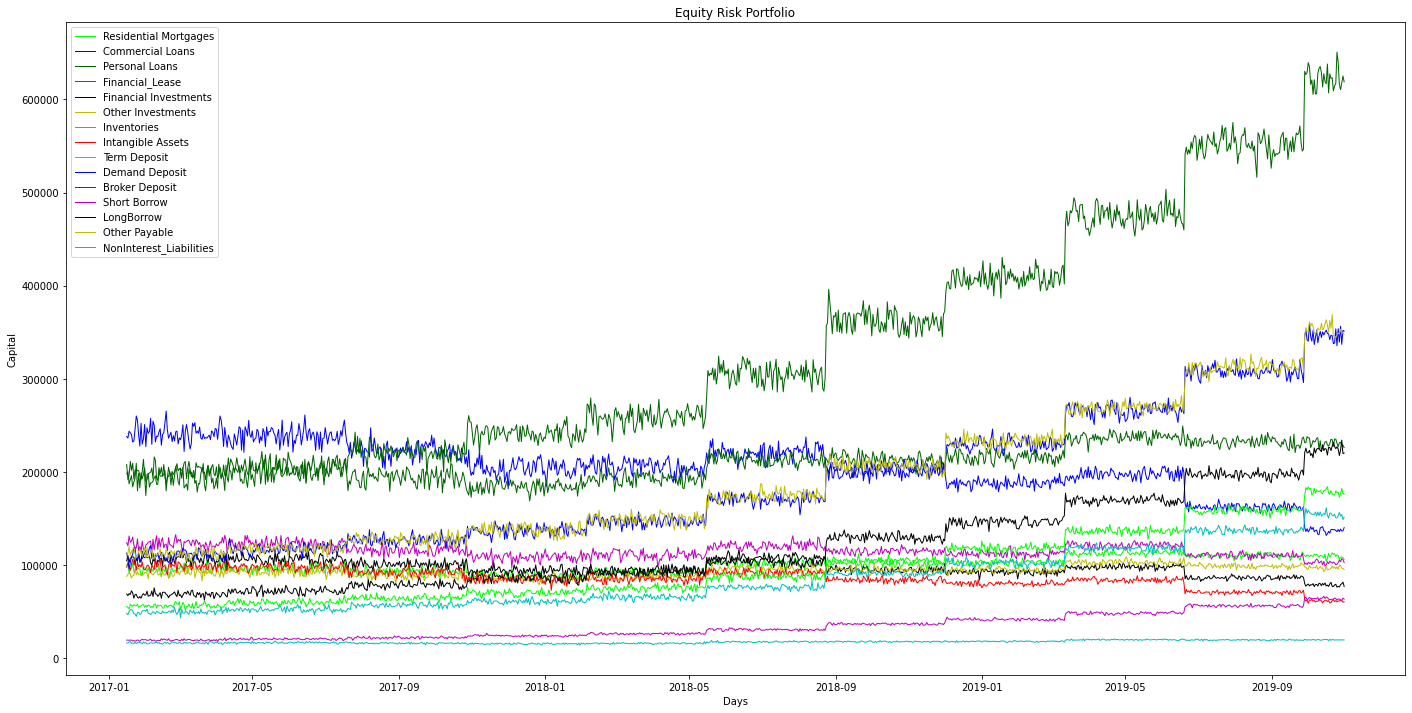

In [ ]:
#Function Call of Equity Risk Diagram
equity_stress_diagram(er_df)
    

In [ ]:
#Creates a Table of the difference of Assets and Liabilities after 
#introduced stress
def spread_df(er_df, df):    
    sp_df = pd.DataFrame()
    sp_df['date'] = dates

    sp_df['datetime'] =pd.to_datetime(sp_df['date'])
    sp_df = sp_df.set_index('datetime')
    sp_df.drop(['date'], axis =1, inplace=True)
    sp_df = sp_df.iloc[15:,:]

    sp_df['Dec_Residential_Mortgages'] = df['Residential_Mortgages'].values - er_df['Residential_Mortgages'].values
    sp_df['Dec_Commercial_Loans'] = df['Commercial_Loans'] - er_df['Commercial_Loans']
    sp_df['Dec_Personal_Loans'] = df['Personal_Loans'] - er_df['Personal_Loans']
    sp_df['Dec_Financial_Lease'] = df['Financial_Lease'] - er_df['Financial_Lease']
    sp_df['Dec_Financial_Investments'] = df['Financial_Investments'] - er_df['Financial_Investments']
    sp_df['Dec_Other_Investments'] = df['Other_Investments'] - er_df['Other_Investments']
    sp_df['Dec_Inventories'] = df['Inventories'] - er_df['Inventories']
    sp_df['Dec_Intangible_Assets'] = df['Intangible_Assets'] - er_df['Intangible_Assets']
    sp_df['Dec_Cash_Equivalent'] = df['Cash_Equivalent'] - er_df['Cash_Equivalent']
    sp_df['Dec_Other_Receivables'] = df['Other_Receivables'] - er_df['Other_Receivables']

    sp_df['Inc_Term_Deposit'] = er_df['Term_Deposit'] - df['Term_Deposit']
    sp_df['Inc_Demand_Deposit'] = er_df['Demand_Deposit'] - df['Demand_Deposit']
    sp_df['Inc_Broker_Deposit'] = er_df['Broker_Deposit'] - df['Broker_Deposit']
    sp_df['Inc_Short_Borrow'] = er_df['Short_Borrow'] - df['Short_Borrow']
    sp_df['Inc_Long_Borrow'] = er_df['Long_Borrow'] - df['Long_Borrow']
    sp_df['Inc_NonInterest_Liabilities'] = er_df['NonInterest_Liabilities'] - df['NonInterest_Liabilities']
    sp_df['Inc_Other_Payable'] = er_df['Other_Payable'] - df['Other_Payable']
    sp_df['Total_Assets'] =sp_df['Dec_Residential_Mortgages']+sp_df['Dec_Commercial_Loans']+sp_df['Dec_Personal_Loans']+sp_df['Dec_Financial_Lease']+sp_df['Dec_Financial_Investments']+ sp_df['Dec_Other_Investments']+sp_df['Dec_Inventories']+sp_df['Dec_Intangible_Assets']+ sp_df['Dec_Cash_Equivalent']+sp_df['Dec_Other_Receivables'] 

    sp_df['Total_Liability']  =sp_df['Inc_Term_Deposit']+sp_df['Inc_Demand_Deposit']+sp_df['Inc_Broker_Deposit']+sp_df['Inc_Short_Borrow']+sp_df['Inc_Long_Borrow']+ sp_df['Inc_NonInterest_Liabilities']+sp_df['Inc_Other_Payable']
    sp_df['Spread']= sp_df['Total_Assets']  - sp_df['Total_Liability'] 
    sp_df['Spread_Percentage'] = sp_df['Spread'] / sp_df['Total_Assets']
    return sp_df


In [ ]:
#Function Call of Spread Portfolio
sp_df = spread_df(er_df, df)
sp_df.head(1)

,Dec_Residential_Mortgages,Dec_Commercial_Loans,Dec_Personal_Loans,Dec_Financial_Lease,Dec_Financial_Investments,Dec_Other_Investments,Dec_Inventories,Dec_Intangible_Assets,Dec_Cash_Equivalent,Dec_Other_Receivables,Inc_Term_Deposit,Inc_Demand_Deposit,Inc_Broker_Deposit,Inc_Short_Borrow,Inc_Long_Borrow,Inc_NonInterest_Liabilities,Inc_Other_Payable,Total_Assets,Total_Liability,Spread,Spread_Percentage
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-16,3761.17,13597.58,7904.94,5937.45,5351.76,3625.43,581.8,5389.22,3045.87,8710.36,1906.64,3458.32,6284.96,651.01,2440.2,1495.17,3464.21,57905.58,19700.51,38205.07,0.659782


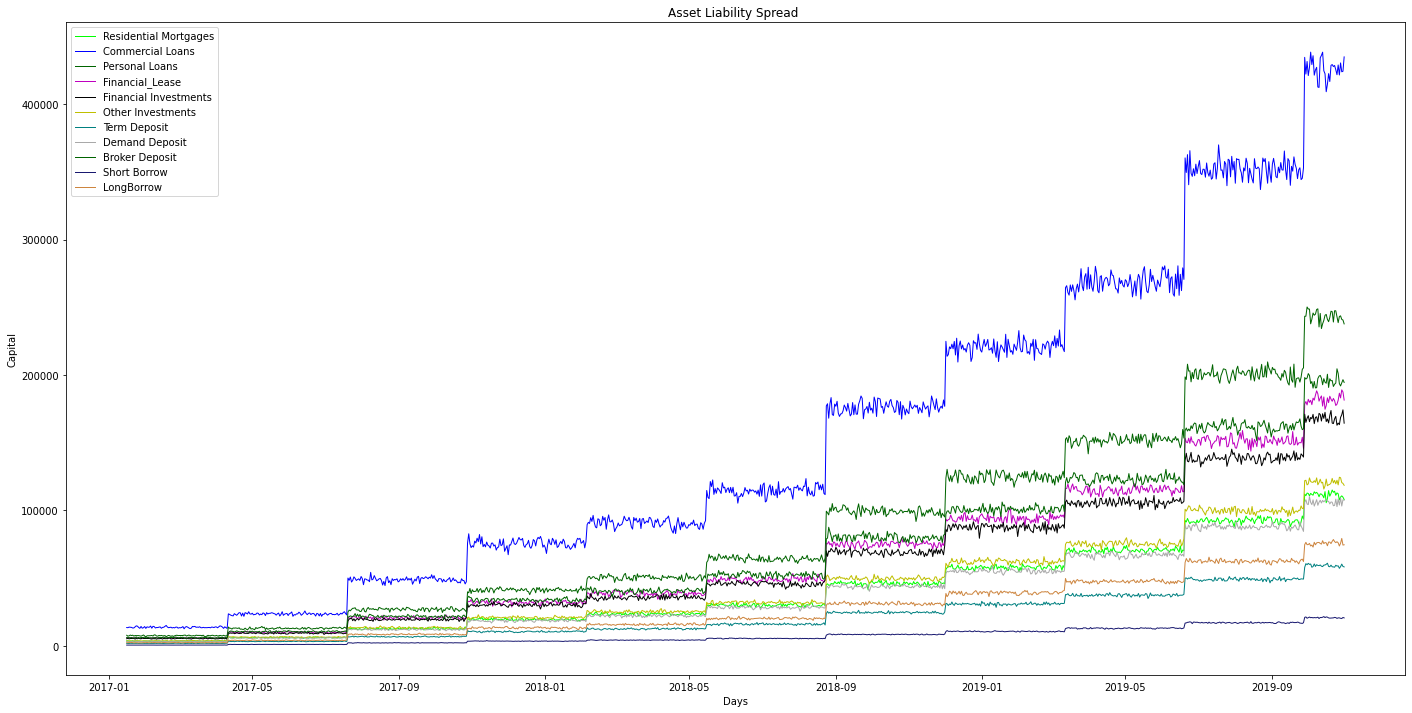

In [ ]:
#Creates a Plot of the Difference of Assets and Liabilities
#after introduced stress
def spread_diagram(sp_df):   
    plt.figure(figsize = (24,12))
    plt.plot(sp_df.Dec_Residential_Mortgages, label = 'Residential Mortgages', color = 'lime', linewidth =1 )
    plt.plot(sp_df.Dec_Commercial_Loans, label = 'Commercial Loans', color = 'b', linewidth =1 )
    plt.plot(sp_df.Dec_Personal_Loans, label = 'Personal Loans', color = 'darkgreen', linewidth =1 )
    plt.plot(sp_df.Dec_Financial_Lease, label = 'Financial_Lease', color = 'm', linewidth =1 )
    plt.plot(sp_df.Dec_Financial_Investments, label = 'Financial Investments', color = 'k', linewidth =1 )
    plt.plot(sp_df.Dec_Other_Investments, label = 'Other Investments', color = 'y', linewidth =1 )
    #plt.plot(sp_df.Dec_Cash_Equivalent, label = 'Cash Equivalent', color = 'skyblue', linewidth =1 )
    #plt.plot(sp_df.Dec_Inventories, label = 'Inventories', color = 'c', linewidth =1 )
    #plt.plot(sp_df.Dec_Intangible_Assets, label = 'Intangible Assets', color = 'firebrick', linewidth =1 )
    #plt.plot(sp_df.Dec_Other_Receivables, label = 'Other Receivables', color = 'pink', linewidth =1 )
    plt.plot(sp_df.Inc_Term_Deposit, label = 'Term Deposit', color = 'teal', linewidth =1 )
    plt.plot(sp_df.Inc_Demand_Deposit, label = 'Demand Deposit', color = 'darkgray', linewidth =1 )
    plt.plot(sp_df.Inc_Broker_Deposit, label = 'Broker Deposit', color = 'darkgreen', linewidth =1 )
    plt.plot(sp_df.Inc_Short_Borrow, label = 'Short Borrow', color = 'midnightblue', linewidth =1 )
    plt.plot(sp_df.Inc_Long_Borrow, label = 'LongBorrow', color = 'peru', linewidth =1 )
    #plt.plot(sp_df.Inc_Other_Payable, label = 'Other Payable', color = 'dodgerblue', linewidth =1 )
    #plt.plot(sp_df.Inc_NonInterest_Liabilities, label = 'NonInterest_Liabilities', color = 'deeppink', linewidth =1 )



    plt.xlabel('Days')
    plt.ylabel('Capital')

    plt.title("Asset Liability Spread ")

    plt.legend()

    plt.show()
    return
spread_diagram(sp_df)

In [ ]:
#Creates multiple Data Sets of portfolios with differing total captial 
#and amount of induced stress
def create_data_set(assets, name, stress ):
    ds_ap = assets_portfolio(assets, name)
    ds_lp = liabilities_portfolio(assets, name)
    ds_full = combine_portfolios(ds_ap,ds_lp)
    ds_full = ds_full.iloc[15:,:]
    ds_stress = equity_risk_df(stress)
    ds_sp = spread_df(ds_stress, ds_full)
    return ds_sp

#Place each group members name in <NAME>, and each pick different starting balance <BAL> and equity risk factor <RISK> 

alaa_df = create_forcasts(300000, "Alaa", 0.09 )
sha_df = create_forcasts(100000000, "Shahad", 0.05 )
asma_df = create_forcasts(500000, "Asma", 0.01 )
maryam_df = create_forcasts(700000, "Maryam", 0.01 )

frames = [alaa_df, sha_df, asma_df, maryam_df] #todo, trim this if your group is smaller
data = pd.concat(frames)
data.shape

(4076, 18)

In [ ]:
#Creates multiple Data Sets of portfolios with differing total captial 
#and amount of induced stress
# def create_data_set(assets, name, stress ):
#     ds_ap = assets_portfolio(assets, name)
#     ds_lp = liabilities_portfolio(assets, name)
#     ds_full = combine_portfolios(ds_ap,ds_lp)
#     ds_full = ds_full.iloc[15:,:]
#     ds_stress = equity_risk_df(stress)
#     ds_sp = spread_df(ds_stress, ds_full)
#     return ds_sp

#Place each group members name in <NAME>, and each pick different starting balance <BAL> and equity risk factor <RISK> 


# frames = [data1, data2, data3]
# data = pd.concat(frames)
# data.shape

In [ ]:
#Function Call of varied Data Set
alaa_df.head(1)

,name,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Inventories,Intangible_Assets,Cash_Equivalent,Other_Receivables,Term_Deposit,Demand_Deposit,Broker_Deposit,Short_Borrow,Long_Borrow,NonInterest_Liabilities,Other_Payable
datetime,,,,,,,,,,,,,,,,,,
2017-01-16,Alaa,31.53,76.54,65.65,39.25,30.83,27.21,4.93,32.07,18.15,64.66,16.69,31.86,56.84,5.9,19.87,14.04,33.09


In [ ]:
#Function Call of all Diagrams
def create_forcasts(assets, name, stress) :
    ap_df = assets_portfolio(assets, name)
    lb_df = liabilities_portfolio(assets, name)
    df = combine_portfolios(ap_df,lb_df)
    df = df.iloc[15:,:]
#     er_df = equity_risk_df(stress)
#     sp_df = spread_df(er_df, df)
#     asset_diagram(as_por)
#     liability_diagram(lb_df)
#     equity_stress_diagram(er_df)
#     spread_diagram(sp_df)
    return df

#Place each group members name in <NAME>, and each pick different starting balance <BAL> and equity risk factor <RISK> 


alaa_df = create_forcasts(300000, "Alaa", 0.09 )
sha_df = create_forcasts(100000000, "Shahad", 0.05 )
asma_df = create_forcasts(500000, "Asma", 0.01 )
maryam_df = create_forcasts(700000, "Maryam", 0.01 )

In [ ]:
sha_df

,name,Residential_Mortgages,Commercial_Loans,Personal_Loans,Financial_Lease,Financial_Investments,Other_Investments,Inventories,Intangible_Assets,Cash_Equivalent,Other_Receivables,Term_Deposit,Demand_Deposit,Broker_Deposit,Short_Borrow,Long_Borrow,NonInterest_Liabilities,Other_Payable
datetime,,,,,,,,,,,,,,,,,,
2017-01-16,Shahad,9730.51,26121.33,19044.60,13861.57,10712.75,9183.08,1641.83,10927.38,6138.03,21357.46,5560.14,10499.26,19106.31,1804.32,6819.88,4992.50,11373.06
2017-01-17,Shahad,10219.12,25432.13,20697.25,13326.64,11102.40,9882.12,1731.02,10251.57,5883.29,20934.80,5896.25,10414.29,19082.38,1880.37,6406.80,5180.67,11378.81
2017-01-18,Shahad,10053.92,25175.90,18677.16,12682.79,12061.18,9373.21,1710.50,10082.38,5894.89,21723.17,5683.09,10497.46,17834.05,2021.68,6705.51,4709.29,10604.30
2017-01-19,Shahad,10000.70,25759.99,21272.39,12455.91,11542.49,9194.63,1739.22,10243.21,6227.72,22737.00,5489.22,10900.29,18181.60,1964.30,6777.81,4720.41,10452.05
2017-01-20,Shahad,9515.18,25851.92,21760.21,13726.67,11434.44,9522.47,1737.04,10795.20,6475.37,20774.83,5455.57,10915.76,18726.14,1812.61,7074.33,4819.53,11312.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,Shahad,22682.14,56695.77,47389.39,27681.36,24744.01,22074.09,3737.25,22423.41,13868.68,49154.21,12151.53,23953.42,42788.26,4295.96,14927.83,10886.05,24154.63
2019-10-28,Shahad,22446.08,54982.03,45929.66,28896.69,24513.99,22011.73,3698.76,23245.95,13728.94,47714.71,12949.25,23697.15,42690.71,4289.96,15473.63,10647.58,24740.52
2019-10-29,Shahad,22397.40,57128.97,47722.00,29303.14,24672.56,21800.96,3711.54,23554.58,13662.80,48974.79,11916.52,24220.23,43024.22,4213.78,15133.34,10767.85,24119.66


![](https://raw.githubusercontent.com/Edward-Beck/dsc-5-capstone-project-online-ds-pt-100118/master/cap%20pictures/Simulations_and_forcasting.png)

In [ ]:
assets = 1000000
name = name
term= [1]*len(dates)
asset_port = pd.DataFrame()

In [ ]:
#This function is recursive and updates itself after every day
#reallocating assets according to Asset-Liability Portfolio
def asset_portfolio_s(assets, name, term):
    if not term:
        return asset_port
    
    else:
        RM = assets*0.30 

        RMmu = RM *0.35
        RMrate = 0.07
        asset_port['Residential_Mortgages'] = random_time_series( RM , RMmu , RMrate )
        
           
        CL = assets*0.20 
        CLmu = CL *0.15   
        CLrate = 0.049
        asset_port['Commercial_Loans'] = random_time_series(CL, CLmu, CLrate)

        PL = assets*0.150 
        PLmu = PL*.3860
        PLrate = 0.135
        asset_port['Personal_Loans'] = random_time_series(PL, PLmu, PLrate)


        FL = assets*0.05 
        FLmu = FL *0.250
        FLrate = 0.059
        asset_port['Financial_Lease'] = random_time_series(FL, FLmu, FLrate)


        FI = assets*0.15 
        FImu = FI*0.1506
        FIrate = 0.0025
        asset_port['Financial_Investments'] = random_time_series(FI, FImu, FIrate)

        OI = assets*0.05 
        OImu = OI*0.609
        OIrate = 0.101
        asset_port['Other_Investments'] = random_time_series(OI, OImu, OIrate)

        I = assets*0.01 
        Imu = I *0.656
        Irate = 0.0046
        asset_port['Inventories'] = random_time_series(I, Imu, Irate)

        IA = assets*0.03 
        IAmu = IA *0.0325
        IArate = 0.0095
        asset_port['Intangible_Assets'] = random_time_series(IA, IAmu, IArate)

        CE = assets*0.04 
        CEmu = CE *0.0750
        CErate = 0.048
        asset_port['Cash_Equivalent'] = random_time_series(CE, CEmu, CErate)

        OR = assets*0.02 
        ORmu = OR *0.05103
        ORrate = 0.0078
        asset_port['Other_Receivables'] = random_time_series(OR, ORmu, ORrate)


        assets = asset_port['Residential_Mortgages'][1]+ asset_port['Commercial_Loans'][1]+asset_port['Personal_Loans'][1]+asset_port['Financial_Lease'][1]+asset_port['Financial_Investments'][1]+asset_port['Other_Investments'][1]+asset_port['Inventories'][1]+asset_port['Intangible_Assets'][1]+asset_port['Cash_Equivalent'][1]+asset_port['Other_Receivables'][1]
           
    
    
    return asset_portfolio_s(assets, name, term[1:])




In [ ]:
# # Function Call of Simulation Asset Portfolio
# ap = asset_portfolio_s(100000000, name, term)
# ap.head()

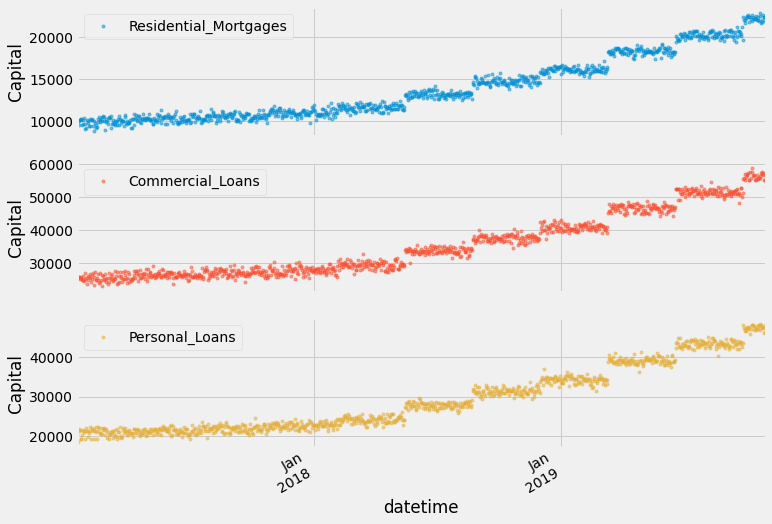

In [ ]:
#Data Visualization of Features with Largest Values
plt.style.use('fivethirtyeight')
cols_plot = ['Residential_Mortgages', 'Commercial_Loans', 'Personal_Loans']
axes = sha_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Capital')
    ax.xaxis.set_minor_locator( mdates.MonthLocator())

Text(0, 0.5, 'Capital')

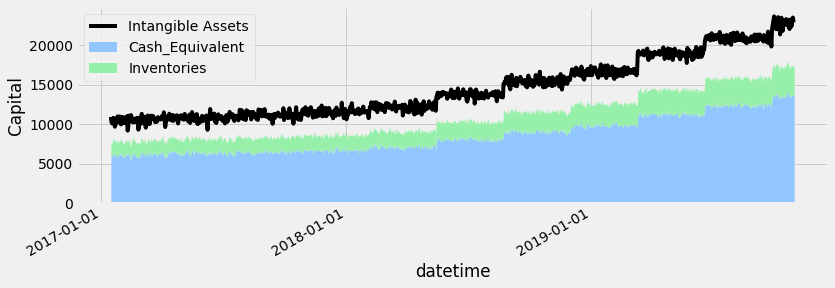

In [ ]:
#Data Visualization of Features with Smallest Values

df_ = sha_df
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(df_['Intangible_Assets'], color='black', label='Intangible Assets')
df_[['Cash_Equivalent', 'Inventories']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Days')
ax.set_ylabel('Capital')

Text(0.5, 1.0, 'Residential Mortgages')

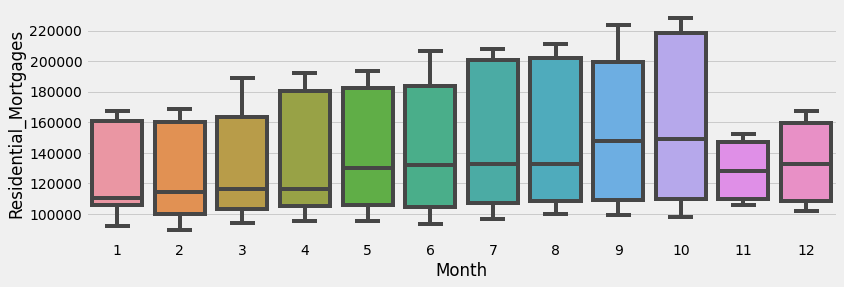

In [ ]:
#Data Exploration of a Feature Grouped by Month
as_por['datetime']= pd.to_datetime(as_por['date'])
as_por = as_por.set_index('datetime')
asset_portfol= as_por
as_por['Month'] = as_por.index.month
as_por['Year'] = as_por.index.year
asset_portfol = as_por
asset_portfol['Month'] = asset_portfol.index.month
#fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
#for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
plt.figure(figsize= (12,4))
sns.boxplot(data=asset_portfol, x='Month', y='Residential_Mortgages')
ax.set_ylabel('Capital')
ax.set_title('Residential Mortgages')

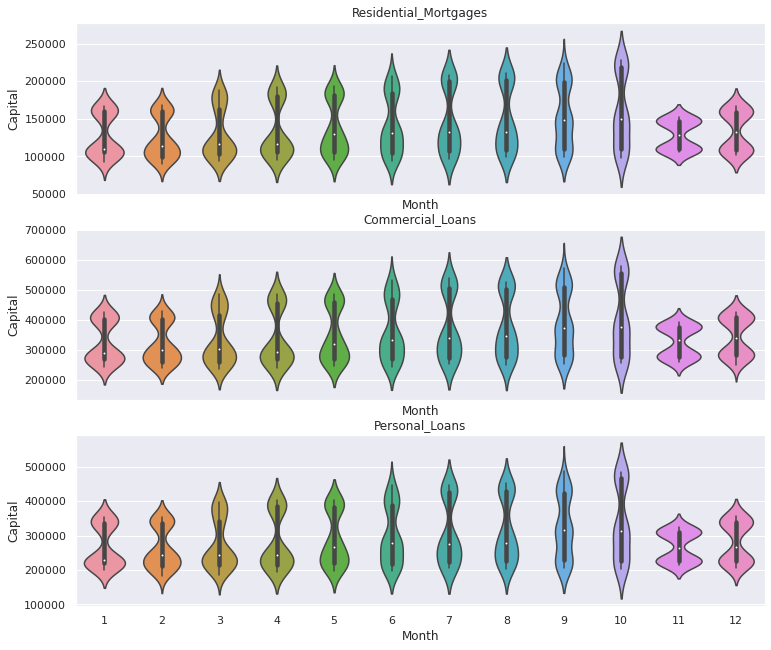

In [ ]:
#Data Exploration of the distribution of largest features in accordance to 
#their respective densities by month
sns.set(rc={'figure.figsize':(12, 4)})
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
    plt.style.use('seaborn-muted')
    sns.violinplot(data=asset_portfol, x='Month', y=name, ax=ax)
    ax.set_ylabel('Capital')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

#### Activity: 

Explore each group members portfolio making use of the above code snippets

Text(0.5, 1.0, 'Residential Mortgages')

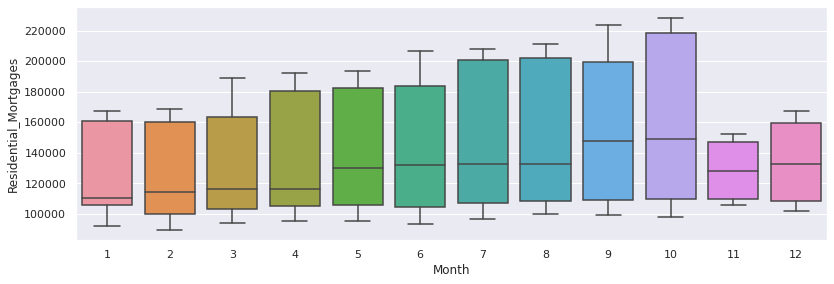

In [ ]:
#Data Exploration of a Feature Grouped by Month
as_por['datetime']= pd.to_datetime(as_por['date'])
as_por = as_por.set_index('datetime')
asset_portfol= as_por
as_por['Month'] = as_por.index.month
as_por['Year'] = as_por.index.year
asset_portfol = as_por
asset_portfol['Month'] = asset_portfol.index.month
#fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
#for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
plt.figure(figsize= (12,4))
sns.boxplot(data=asset_portfol, x='Month', y='Residential_Mortgages')
ax.set_ylabel('Capital')
ax.set_title('Residential Mortgages')

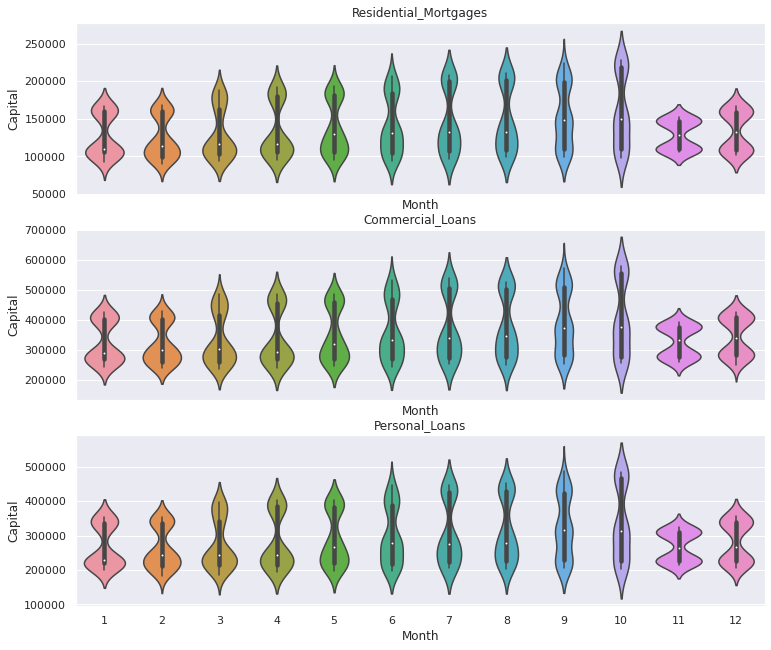

In [ ]:
#Data Exploration of the distribution of largest features in accordance to 
#their respective densities by month
sns.set(rc={'figure.figsize':(12, 4)})
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Residential_Mortgages','Commercial_Loans','Personal_Loans'], axes):
    plt.style.use('seaborn-muted')
    sns.violinplot(data=asset_portfol, x='Month', y=name, ax=ax)
    ax.set_ylabel('Capital')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')